## Phase 4 (Modeling): Random Forest

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 17](https://data-science.training/kapitel-17/)
* Datum: 23.03.2023

Versionen 7 und 8

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# NumPy Paket (Package) importieren
#  Mehrdimensionale Datenstrukturen (Vektoren, Matrizen, Tensoren, Arrays), Lineare Algebra
#  https://numpy.org/doc/
import numpy as np
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf

In [5]:
# Datenversion festlegen: 7, 8
version  = 8
# Modell-Abkürzung festlegen: rf = Random Forest
shortcut = 'rf'

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/new/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Survived)
X = df_train.iloc[:,1:].values
# Klassenattribut (Survived) extrahieren
y = df_train.iloc[:,0].values

In [8]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [9]:
# Random Forest Methode auswählen
#  (KNIME: "XYZ Learner")
model = RandomForestClassifier(random_state=0, oob_score=True)
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [10]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores(model, X, y, cv=skf)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 476
* TP (True  Positives) : 252
* FN (False Negatives) : 90
* FP (False Positives) : 73

Gütemaße

* Genauigkeit  (Accuracy)    :   81,71 %
* Spezifität   (Specificity) :   86,69 %
* Sensitivität (Sensitivity) :   73,70 %
* Präzision    (Precision)   :   77,90 %
* Recall       (Recall)      :   73,70 %
* F-Maß        (F Score)     :   75,58 %
* AURC         (AURC)        :   87,43 %
* LogLoss      (LogLoss)     :    0,621

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  80,65 %


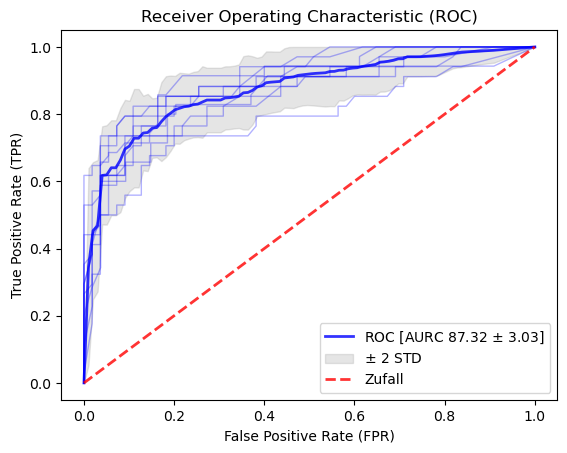

In [11]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X, y, cv=skf)

In [12]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X, y)

RandomForestClassifier(oob_score=True, random_state=0)

In [13]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/new/' + shortcut + '_v' + str(version)
pk.dump(model, open(filename, 'wb'))

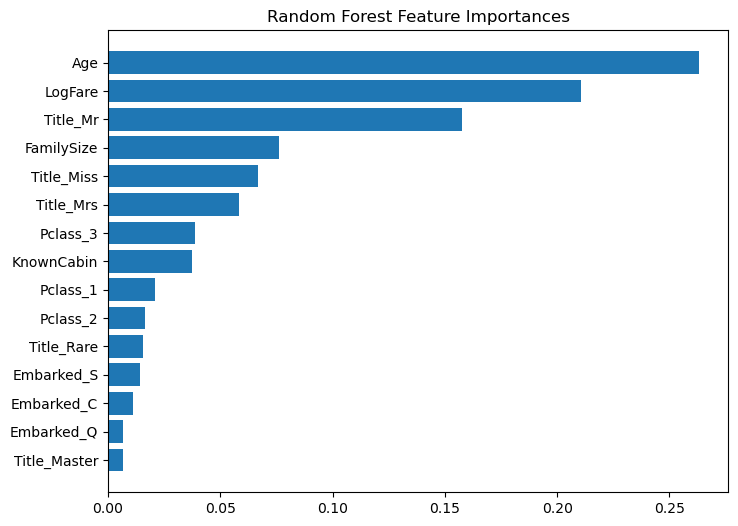

In [14]:
# Horizontales Balkendiagramm mit der "Feature Importance (fi)"
#  (KNIME: "Random Forest Learner")
#
# Extraktion der Feature-Namen und -Werte
names  = df_train.columns.values
names  = np.delete(names, 0) # Ersten Spaltennamen (= Survived) entfernen
values = model.feature_importances_
#
# Data Frame aus dem Dictionary der Namen und Werte erstellen und aufsteigend sortieren
df_fi = pd.DataFrame({'names': names, 'values': values})
df_fi = df_fi.sort_values('values')
#
# Horizontales Balkendiagramm erstellen
plt.figure(figsize=(8,6))
plt.barh('names', 'values', data=df_fi)
plt.title('Random Forest Feature Importances')
plt.show()

In [15]:
display(df_fi)

,names,values
10,Title_Master,0.006740
8,Embarked_Q,0.006859
7,Embarked_C,0.010976
9,Embarked_S,0.014151
14,Title_Rare,0.015537
5,Pclass_2,0.016230
4,Pclass_1,0.021008
1,KnownCabin,0.037160
6,Pclass_3,0.038911
13,Title_Mrs,0.058165


In [16]:
# Out-of-Bag (OOB) Statistics
#  (KNIME: "Random Forest Learner")
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html
acc = model.oob_score_
print('Genauigkeit (OOB): %6.2f %%' % (100*acc))

Genauigkeit (OOB):  80.70 %


## Ergebnisse

#### Version 7 (Int)

Confusion Matrix

* TN (True  Negatives) : 480
* TP (True  Positives) : 253
* FN (False Negatives) : 89
* FP (False Positives) : 69

Gütemaße

* Genauigkeit  (Accuracy)    :   82,27 %
* Spezifität   (Specificity) :   87,43 %
* Sensitivität (Sensitivity) :   74,00 %
* Präzision    (Precision)   :   78,91 %
* Recall       (Recall)      :   74,00 %
* F-Maß        (F Score)     :   76,21 %
* AURC         (AURC)        :   86,75 %
* LogLoss      (LogLoss)     :    0,600

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,03 %

#### Version 8 (Float)

Confusion Matrix

* TN (True  Negatives) : 476
* TP (True  Positives) : 252
* FN (False Negatives) : 90
* FP (False Positives) : 73

Gütemaße

* Genauigkeit  (Accuracy)    :   81,71 %
* Spezifität   (Specificity) :   86,69 %
* Sensitivität (Sensitivity) :   73,70 %
* Präzision    (Precision)   :   77,90 %
* Recall       (Recall)      :   73,70 %
* F-Maß        (F Score)     :   75,58 %
* AURC         (AURC)        :   87,43 %
* LogLoss      (LogLoss)     :    0,621

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  80,65 %
